In [1]:
from rdkit import Chem
from syba.syba import SybaClassifier
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
syba = SybaClassifier()
syba.fitDefaultScore()

In [3]:
data = pd.read_excel('All_generated_SMILES_SYBA_filtration.xlsx')

In [4]:
data.head()

,Unnamed: 0,Unnamed: 0.1,SMILES,molecular_weight,logp,h_bond_donors,h_bond_acceptors,rotatable_bonds,Polar surface area,aromatics rings,Lipinski alerts - to QED calc,Lipinski Rule of 5,QED,0.1_tensor_scaling_prediction,0.2_tensor_scaling_prediction,SYBA_score
0,0,0,CCC(=O)NCC1=CC=NN1S2C=C(C3=CC=CC=C3F)N[NH1]2,335.121609,1.83410,4,5,5,70.98,2,1,1,0.629409,1,0,32.794988
1,1,1,CCC(=O)N1CC2C(C#N)(S(=O)C3=CC=CC=N3)CC12,289.088498,1.09228,0,4,3,74.06,1,0,1,0.834638,1,0,1.849720
2,2,2,CCC(=O)N1C=2C=CN(C3=NC=NC(C#N)=C3C)C=2S1C,301.099731,2.10890,1,5,2,74.81,2,1,1,0.862074,1,0,11.632493
3,4,4,CCC(=O)NCC1=CC=NN1S=2C=C(C3=CC=CC=C3F)NC=2C,346.126360,2.83200,2,4,5,58.95,2,1,1,0.818708,1,0,39.470311
4,8,8,CCC(=O)NCC1C(C2=N[NH1]C=C2C(C)(C)O)N=C1N,279.169525,0.19140,4,5,5,116.39,1,0,1,0.615305,1,0,5.243035


In [5]:
whole_data_after_QED_Lipinski = pd.read_excel('All_generated_SMILES_QED_Lipinski.xlsx')

In [6]:
mols = [Chem.MolFromSmiles(smi) for smi in whole_data_after_QED_Lipinski['SMILES']]

In [7]:
SYBA_scores = [syba.predict(mol=mol) for mol in mols] 

In [8]:
whole_data_after_QED_Lipinski['SYBA_score'] = SYBA_scores

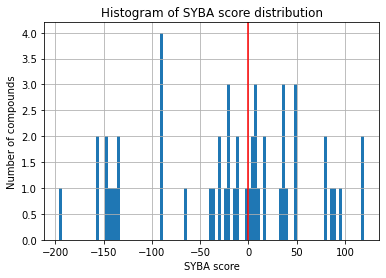

count     51.000000
mean     -21.897010
std       80.615727
min     -195.663108
25%      -90.291542
50%      -12.866572
75%       35.160217
max      119.444502
Name: SYBA_score, dtype: float64
Kurtosis:
-0.6899
Skewness:
-0.3588


In [9]:
plt.hist(whole_data_after_QED_Lipinski['SYBA_score'],bins=100)
plt.xlabel('SYBA score')
plt.ylabel('Number of compounds')
plt.title('Histogram of SYBA score distribution')
plt.axvline(x=0.0, color='r')
plt.grid(True)
plt.show()

print(whole_data_after_QED_Lipinski['SYBA_score'].describe())
print('Kurtosis:')
print(round(whole_data_after_QED_Lipinski['SYBA_score'].kurtosis(),4))
print('Skewness:')
print(round(whole_data_after_QED_Lipinski['SYBA_score'].skew(),4))

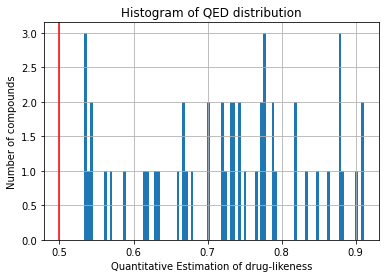

count    51.000000
mean      0.724967
std       0.111984
min       0.533685
25%       0.647967
50%       0.734185
75%       0.791961
max       0.910755
Name: QED, dtype: float64
Kurtosis:
-0.8753
Skewness:
-0.1896


In [10]:
plt.hist(whole_data_after_QED_Lipinski['QED'],bins=100)
plt.xlabel('Quantitative Estimation of drug-likeness')
plt.ylabel('Number of compounds')
plt.title('Histogram of QED distribution')
plt.axvline(x=0.5, color='r')
plt.grid(True)
plt.show()

print(whole_data_after_QED_Lipinski['QED'].describe())
print('Kurtosis:')
print(round(whole_data_after_QED_Lipinski['QED'].kurtosis(),4))
print('Skewness:')
print(round(whole_data_after_QED_Lipinski['QED'].skew(),4))

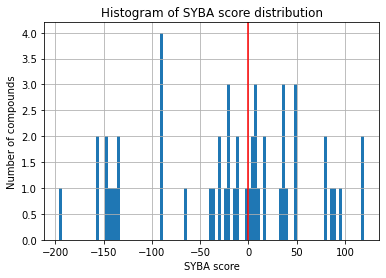

count     51.000000
mean     -21.897010
std       80.615727
min     -195.663108
25%      -90.291542
50%      -12.866572
75%       35.160217
max      119.444502
Name: SYBA_score, dtype: float64
Kurtosis:
-0.6899
Skewness:
-0.3588


In [11]:
plt.hist(whole_data_after_QED_Lipinski['SYBA_score'],bins=100)
plt.xlabel('SYBA score')
plt.ylabel('Number of compounds')
plt.title('Histogram of SYBA score distribution')
plt.axvline(x=0.0, color='r')
plt.grid(True)
plt.show()

print(whole_data_after_QED_Lipinski['SYBA_score'].describe())
print('Kurtosis:')
print(round(whole_data_after_QED_Lipinski['SYBA_score'].kurtosis(),4))
print('Skewness:')
print(round(whole_data_after_QED_Lipinski['SYBA_score'].skew(),4))

In [12]:
whole_data_after_QED_Lipinski['QED normalized'] =(whole_data_after_QED_Lipinski['QED']-whole_data_after_QED_Lipinski['QED'].min())/(whole_data_after_QED_Lipinski['QED'].max()-whole_data_after_QED_Lipinski['QED'].min())

In [13]:
whole_data_after_QED_Lipinski['SYBA_score normalized'] =(whole_data_after_QED_Lipinski['SYBA_score']-whole_data_after_QED_Lipinski['SYBA_score'].min())/(whole_data_after_QED_Lipinski['SYBA_score'].max()-whole_data_after_QED_Lipinski['SYBA_score'].min())

In [14]:
whole_data_after_QED_Lipinski.head()

,Unnamed: 0,SMILES,molecular_weight,logp,h_bond_donors,h_bond_acceptors,rotatable_bonds,Polar surface area,aromatics rings,Lipinski alerts - to QED calc,Lipinski Rule of 5,QED,0.1_tensor_scaling_prediction,0.2_tensor_scaling_prediction,SYBA_score,QED normalized,SYBA_score normalized
0,0,CCC(=O)NCC1=CC=NN1S2C=C(C3=CC=CC=C3F)N[NH1]2,335.121609,1.83410,4,5,5,70.98,2,1,1,0.629409,1,0,32.794988,0.253862,0.725016
1,1,CCC(=O)N1CC2C(C#N)(S(=O)C3=CC=CC=N3)CC12,289.088498,1.09228,0,4,3,74.06,1,0,1,0.834638,1,0,1.849720,0.798135,0.626811
2,2,CCC(=O)N1C=2C=CN(C3=NC=NC(C#N)=C3C)C=2S1C,301.099731,2.10890,1,5,2,74.81,2,1,1,0.862074,1,0,11.632493,0.870896,0.657857
3,3,CCC(=O)NCC(C1)=NN=C(C2=CC=C(C)C(CF)=C2)S1,307.115461,2.84012,1,4,5,53.82,1,0,1,0.909168,1,0,-3.031634,0.995791,0.611320
4,4,CCC(=O)NCC1=CC=NN1S=2C=C(C3=CC=CC=C3F)NC=2C,346.126360,2.83200,2,4,5,58.95,2,1,1,0.818708,1,0,39.470311,0.755889,0.746200


In [15]:
whole_data_after_QED_Lipinski['My_score'] = (round(((whole_data_after_QED_Lipinski['SYBA_score normalized']+whole_data_after_QED_Lipinski['QED normalized']))*100/2,2))

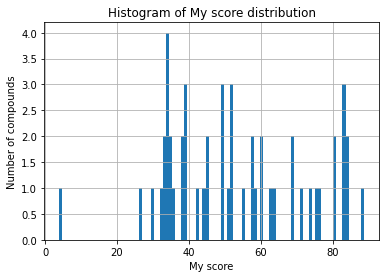

count    51.000000
mean     52.936667
std      19.289611
min       3.990000
25%      37.140000
50%      51.290000
75%      68.535000
max      88.540000
Name: My_score, dtype: float64
Kurtosis:
-0.585
Skewness:
0.1275


In [16]:
plt.hist(whole_data_after_QED_Lipinski['My_score'],bins=100)
plt.xlabel('My score')
plt.ylabel('Number of compounds')
plt.title('Histogram of My score distribution')
#plt.axvline(x=0.0, color='r')
plt.grid(True)
plt.show()

print(whole_data_after_QED_Lipinski['My_score'].describe())
print('Kurtosis:')
print(round(whole_data_after_QED_Lipinski['My_score'].kurtosis(),4))
print('Skewness:')
print(round(whole_data_after_QED_Lipinski['My_score'].skew(),4))

In [17]:
whole_data_after_QED_Lipinski[(whole_data_after_QED_Lipinski['My_score'] >0) & (whole_data_after_QED_Lipinski['SYBA_score'] >0)]

,Unnamed: 0,SMILES,molecular_weight,logp,h_bond_donors,h_bond_acceptors,rotatable_bonds,Polar surface area,aromatics rings,Lipinski alerts - to QED calc,Lipinski Rule of 5,QED,0.1_tensor_scaling_prediction,0.2_tensor_scaling_prediction,SYBA_score,QED normalized,SYBA_score normalized,My_score
0,0,CCC(=O)NCC1=CC=NN1S2C=C(C3=CC=CC=C3F)N[NH1]2,335.121609,1.83410,4,5,5,70.98,2,1,1,0.629409,1,0,32.794988,0.253862,0.725016,48.94
1,1,CCC(=O)N1CC2C(C#N)(S(=O)C3=CC=CC=N3)CC12,289.088498,1.09228,0,4,3,74.06,1,0,1,0.834638,1,0,1.849720,0.798135,0.626811,71.25
2,2,CCC(=O)N1C=2C=CN(C3=NC=NC(C#N)=C3C)C=2S1C,301.099731,2.10890,1,5,2,74.81,2,1,1,0.862074,1,0,11.632493,0.870896,0.657857,76.44
4,4,CCC(=O)NCC1=CC=NN1S=2C=C(C3=CC=CC=C3F)NC=2C,346.126360,2.83200,2,4,5,58.95,2,1,1,0.818708,1,0,39.470311,0.755889,0.746200,75.10
8,8,CCC(=O)NCC1C(C2=N[NH1]C=C2C(C)(C)O)N=C1N,279.169525,0.19140,4,5,5,116.39,1,0,1,0.615305,1,0,5.243035,0.216460,0.637579,42.70
11,11,CCC(=O)NCC1=CC=NN1S=2C=C(C3=CC=CC=C3F)[NH1]N=2,333.105959,2.13020,2,5,5,71.31,2,0,1,0.880428,1,0,35.550294,0.919571,0.733760,82.67
13,13,CC1=CC=CC(C(=O)CC2=NC(Cl)=CC3=CC=CN=C23)=C1,296.071641,4.01702,0,3,3,42.85,3,2,1,0.541441,1,0,79.238291,0.020569,0.872405,44.65
14,14,CC1=CC=CC(C(=O)NC2=CC(C3=CC=CC=C3)=NO2)=C1,278.105528,3.90232,1,3,3,55.13,3,0,1,0.790067,1,0,119.444502,0.679932,1.000000,84.00
15,15,CC1=CC=CC(C(=O)CC2=NC(CC3=CC=CO3)=CS2)=C1,297.082350,4.06072,0,4,5,43.10,3,1,1,0.666935,1,0,90.134321,0.353384,0.906984,63.02
22,22,CC(=O)NC1=CC=CC(=C1)C(=O)N(CC2=CC=CC=C2NC3=NC(...,458.161500,3.53110,3,8,2,135.40,3,0,1,0.534480,1,0,47.431533,0.002109,0.771465,38.68


In [18]:
whole_data_after_QED_Lipinski.head()

,Unnamed: 0,SMILES,molecular_weight,logp,h_bond_donors,h_bond_acceptors,rotatable_bonds,Polar surface area,aromatics rings,Lipinski alerts - to QED calc,Lipinski Rule of 5,QED,0.1_tensor_scaling_prediction,0.2_tensor_scaling_prediction,SYBA_score,QED normalized,SYBA_score normalized,My_score
0,0,CCC(=O)NCC1=CC=NN1S2C=C(C3=CC=CC=C3F)N[NH1]2,335.121609,1.83410,4,5,5,70.98,2,1,1,0.629409,1,0,32.794988,0.253862,0.725016,48.94
1,1,CCC(=O)N1CC2C(C#N)(S(=O)C3=CC=CC=N3)CC12,289.088498,1.09228,0,4,3,74.06,1,0,1,0.834638,1,0,1.849720,0.798135,0.626811,71.25
2,2,CCC(=O)N1C=2C=CN(C3=NC=NC(C#N)=C3C)C=2S1C,301.099731,2.10890,1,5,2,74.81,2,1,1,0.862074,1,0,11.632493,0.870896,0.657857,76.44
3,3,CCC(=O)NCC(C1)=NN=C(C2=CC=C(C)C(CF)=C2)S1,307.115461,2.84012,1,4,5,53.82,1,0,1,0.909168,1,0,-3.031634,0.995791,0.611320,80.36
4,4,CCC(=O)NCC1=CC=NN1S=2C=C(C3=CC=CC=C3F)NC=2C,346.126360,2.83200,2,4,5,58.95,2,1,1,0.818708,1,0,39.470311,0.755889,0.746200,75.10


In [19]:
new__ = ()
data_ = list(data["SMILES"])
for element in range(len(data_)):
    if data_[element] in list(whole_data_after_QED_Lipinski['SMILES']):
        print(whole_data_after_QED_Lipinski[whole_data_after_QED_Lipinski['SMILES'] == str(data_[element])][['SMILES', "QED", 'SYBA_score', 'QED normalized', 'SYBA_score normalized', 'My_score']])
    else:
        pass


                                         SMILES       QED  SYBA_score  \
0  CCC(=O)NCC1=CC=NN1S2C=C(C3=CC=CC=C3F)N[NH1]2  0.629409   32.794988   

   QED normalized  SYBA_score normalized  My_score  
0        0.253862               0.725016     48.94  
                                     SMILES       QED  SYBA_score  \
1  CCC(=O)N1CC2C(C#N)(S(=O)C3=CC=CC=N3)CC12  0.834638     1.84972   

   QED normalized  SYBA_score normalized  My_score  
1        0.798135               0.626811     71.25  
                                      SMILES       QED  SYBA_score  \
2  CCC(=O)N1C=2C=CN(C3=NC=NC(C#N)=C3C)C=2S1C  0.862074   11.632493   

   QED normalized  SYBA_score normalized  My_score  
2        0.870896               0.657857     76.44  
                                        SMILES       QED  SYBA_score  \
4  CCC(=O)NCC1=CC=NN1S=2C=C(C3=CC=CC=C3F)NC=2C  0.818708   39.470311   

   QED normalized  SYBA_score normalized  My_score  
4        0.755889                 0.7462      75.1  
    